In [68]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import sklearn
from sklearn import preprocessing


from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import validation_curve, learning_curve
import graphviz

In [96]:
films = pd.read_csv('films_profit.csv')

In [97]:
films.hit.value_counts()

0    4622
1     753
Name: hit, dtype: int64

In [57]:
print "Hit rate:", 753/5389.

Hit rate: 0.139729077751


In [139]:
films_data = films.set_index('title')

target = films_data.dropna().hit
films_data = films_data.drop(['film_id', 'release_date', 'hit', 'genres', 'revenue', 'profit'], axis=1).dropna()

In [140]:
films_data.head()

,release_week,runtime,budget,animation,adventure,action,comedy,crime,drama,fantasy,...,history,horror,music,mystery,romance,science fiction,thriller,war,western,num_bankable_actor
title,,,,,,,,,,,,,,,,,,,,,
Four Rooms,49,98.0,4000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Star Wars,21,121.0,11000000,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Finding Nemo,21,100.0,94000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Forrest Gump,27,142.0,55000000,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
American Beauty,37,122.0,15000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


[0.8606271975520992,
 0.8647309816058082,
 0.8680815768328947,
 0.8686391925132702,
 0.8662262982896338,
 0.8643723863129622,
 0.860833194621687,
 0.8600841414571091,
 0.8511504127442097,
 0.846502873899811,
 0.8358997094247886,
 0.8318035596490905,
 0.8243616541415187,
 0.8206337889240292,
 0.8169204524671152,
 0.8100341179275041,
 0.8081635965155634,
 0.805933113244188,
 0.805564823548511]

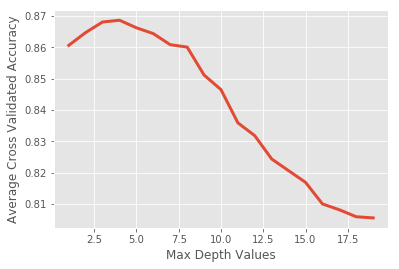

In [162]:
#Answer
max_depths = range(1, 20)

cv_scores = []

for i in range(1, 20):
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth=i), films_data, target, cv=20, scoring = "accuracy")
    cv_scores.append(cv_score.mean())


plt.plot(max_depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");

cv_scores

In [163]:
#Assign best depth value to depth
depth = 5


In [167]:
#Train and test with random state = 4 and test size = .25
X_train, X_test, y_train, y_test = train_test_split(films_data, target, test_size = .25, random_state = 4)


#Fit model with best depth value
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)

#Score model on test set
testscore = model.score(X_test, y_test)

print ("The test score is {:.3f} percent".format(testscore*100))

The test score is 86.161 percent


In [168]:
fi = pd.DataFrame(list(zip(films_data.columns, model.feature_importances_)), columns=["features", "importance_score"])
fi.sort_values(by = "importance_score", ascending=False)



,features,importance_score
2,budget,0.516759
1,runtime,0.181027
20,num_bankable_actor,0.124475
0,release_week,0.061489
8,drama,0.058361
4,adventure,0.015604
10,family,0.015431
5,action,0.011194
3,animation,0.009824
6,comedy,0.005835


In [171]:
X_test.head(1)

,release_week,runtime,budget,animation,adventure,action,comedy,crime,drama,fantasy,...,history,horror,music,mystery,romance,science fiction,thriller,war,western,num_bankable_actor
title,,,,,,,,,,,,,,,,,,,,,
Bullitt,41,113.0,5500000,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [173]:
# Bust
justice_league =            [[46, 119., 500000000, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]]    

# Current Releases
black_panther =             [[6 , 134., 200000000, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
wrinkle_in_time =           [[9 , 109., 110000000, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
death_wish =                [[8 , 107.,  30000000, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]]

# Upcoming Releases
pacific_rim_uprising =      [[11, 111., 150000000, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]
ready_player_one =          [[12, 140., 175000000, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]
avengers_infinity_war =     [[16, 156., 500000000, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3]]


#Release Date = November 17, 2017, Budget = $500M, Revenue= $657M
print model.predict(justice_league)

#Release Date = February 16, 2018, Budget = $200M, Revenue = $1.2B
print model.predict(black_panther)

#Release Date = March 9, 2018, Budget = $110M, Revenue = $71.7M
print model.predict(wrinkle_in_time)

#Release Date = March 2, 2018, Budget = $30M, Revenue = $37.3M
print model.predict(death_wish)


print model.predict(pacific_rim_uprising)
print model.predict(ready_player_one)
print model.predict(avengers_infinity_war)

[0]
[1]
[0]
[0]
[0]
[1]
[1]


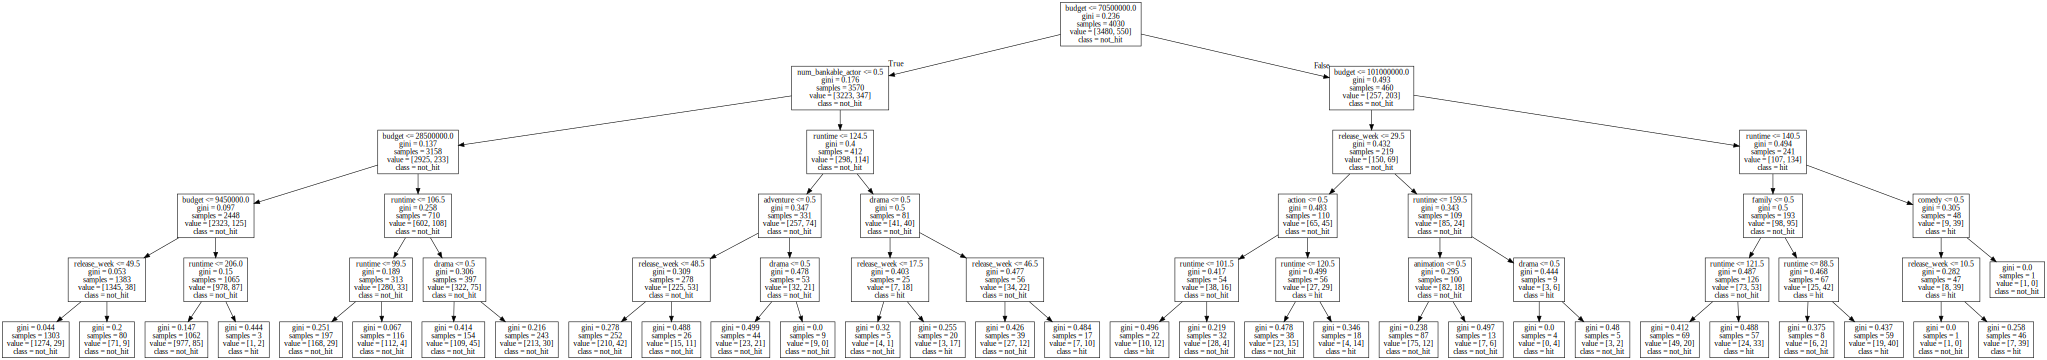

In [160]:
#Export the decision tree graph viz object. We have to export and the re-import it
export_graphviz(model, out_file='films.dot', 
                    feature_names=films_data.columns, 
                    class_names=["not_hit", "hit"])
with open("films.dot") as f: 
        dot_graph = f.read()
graphviz.Source(dot_graph)